In [640]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import pycountry
from wordcloud import WordCloud
import plotly.express as px




In [553]:
nf = pd.read_csv("netflix_titles 3.csv")

In [555]:
nf.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [557]:
nf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [559]:
#Checking the overall dataset

In [561]:
#Checking the overall dataset
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [563]:
#checking the missing, null, NaN, empty strings in the given dataset using funtion (def) 

#function to check for missing, null, NaN, and empty values
def check_missing_values(dnf):
    missing_data = pd.DataFrame(columns=['Column', 'Missing Values', 'Null Values', 'NaN Values', 'Empty Strings'])

    for column in nf.columns:
        missing_values = nf[column].isna().sum()
        null_values = nf[column].isnull().sum()
        nan_values = nf[column].isna().sum()
        
        if nf[column].dtype == 'object':  #check if the column is of string type
            empty_strings = (nf[column] == '').sum()
        else:
            empty_strings = 0  #non-string 

        #create a new row as a DataFrame
        new_row = pd.DataFrame({
            'Column': [column],
            'Missing Values': [missing_values],
            'Null Values': [null_values],
            'NaN Values': [nan_values],
            'Empty Strings': [empty_strings]
        })

        missing_data = pd.concat([missing_data, new_row], ignore_index=True)

    return missing_data


missing_values_nf = check_missing_values(nf) #check for missing values
print(missing_values_nf)

          Column Missing Values Null Values NaN Values Empty Strings
0        show_id              0           0          0             0
1           type              0           0          0             0
2          title              0           0          0             0
3       director           2634        2634       2634             0
4           cast            825         825        825             0
5        country            831         831        831             0
6     date_added             10          10         10             0
7   release_year              0           0          0             0
8         rating              4           4          4             0
9       duration              3           3          3             0
10     listed_in              0           0          0             0
11   description              0           0          0             0


In [565]:
#handling missing values in 'director' by replacing them with 'unknown' and setting the column type as string

nf['director']= nf['director'].fillna('Unknown').astype(str)

In [567]:
#checking if the nulls are replaced successfully
print(nf['director'].isna().sum())

0


In [569]:
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [571]:
#handling missing values in 'cast' and setting the dtype as string

nf['cast'] = nf['cast'].fillna('Not Available').astype(str)

In [573]:
#verifying if the values are replaced
print(nf['cast'].isna().sum())

0


In [574]:
#handling missing values in 'country' and setting dtype as string

nf['country'] = nf['country'].fillna('Unknown').astype(str)
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Not Available,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [575]:
#verfifying if the values are replaced
nf['country'].isna().sum()

0

In [579]:
#handling missing values in 'date_added' and setting dtype as date

nf.dropna(subset=['date_added'], inplace=True)

In [581]:
#verifying if the values are dropped and the column is clean

nf['date_added'].isna().sum()

0

In [583]:
#converting date_added to date dtype
nf['date_added'] = nf['date_added'].astype(str)
nf['date_added'] = pd.to_datetime(nf['date_added'].str.strip(), format='mixed')


In [585]:
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Not Available,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [587]:
#again checking for missing values in the dataset 

missing_values_nf = check_missing_values(nf)
print(missing_values_nf)

          Column Missing Values Null Values NaN Values Empty Strings
0        show_id              0           0          0             0
1           type              0           0          0             0
2          title              0           0          0             0
3       director              0           0          0             0
4           cast              0           0          0             0
5        country              0           0          0             0
6     date_added              0           0          0             0
7   release_year              0           0          0             0
8         rating              4           4          4             0
9       duration              3           3          3             0
10     listed_in              0           0          0             0
11   description              0           0          0             0


In [589]:
#handling missing values in 'rating'. Method -> drop

nf.dropna(subset=['rating'], inplace=True)

In [591]:
nf['rating'].isna().sum()

0

In [593]:
#handling missing values in 'duration' 
nf.dropna(subset=['duration'], inplace=True)

In [595]:
#checking if the missing values are taken care of
nf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [597]:
#again checking for missing values in the dataset 

missing_values_nf = check_missing_values(nf)
print(missing_values_nf)

          Column Missing Values Null Values NaN Values Empty Strings
0        show_id              0           0          0             0
1           type              0           0          0             0
2          title              0           0          0             0
3       director              0           0          0             0
4           cast              0           0          0             0
5        country              0           0          0             0
6     date_added              0           0          0             0
7   release_year              0           0          0             0
8         rating              0           0          0             0
9       duration              0           0          0             0
10     listed_in              0           0          0             0
11   description              0           0          0             0


In [ ]:
#EDA on the given dataset to uncover insights

Percentage of Movies and TV Shows:
type
Movie      69.692833
TV Show    30.307167
Name: count, dtype: float64


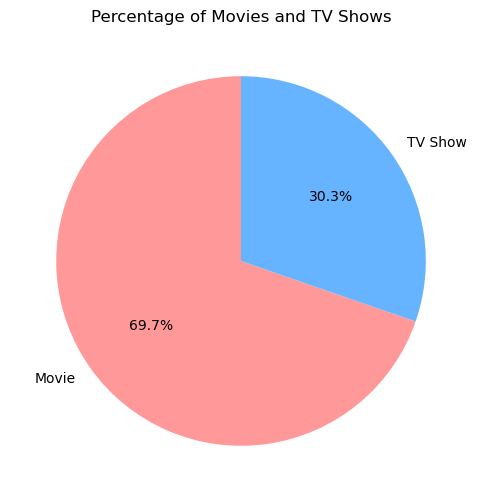

In [187]:
#what percent of movies and tv shows does netflix have? 


type_counts = nf['type'].value_counts() #calculate count of movies and tv shows
type_percentages = type_counts / type_counts.sum() * 100

print("Percentage of Movies and TV Shows:")
print(type_percentages)

#pie chart plot
plt.figure(figsize=(6, 6))
plt.pie(type_percentages, labels=type_percentages.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Percentage of Movies and TV Shows')
plt.show()

Movies and TV Shows Added Each Year:
type        Movie  TV Show
year_added                
2008            1        1
2009            2        0
2010            1        0
2011           13        0
2012            3        0
2013            6        5
2014           19        5
2015           56       26
2016          251      175
2017          836      349
2018         1237      411
2019         1424      592
2020         1284      595
2021          993      505


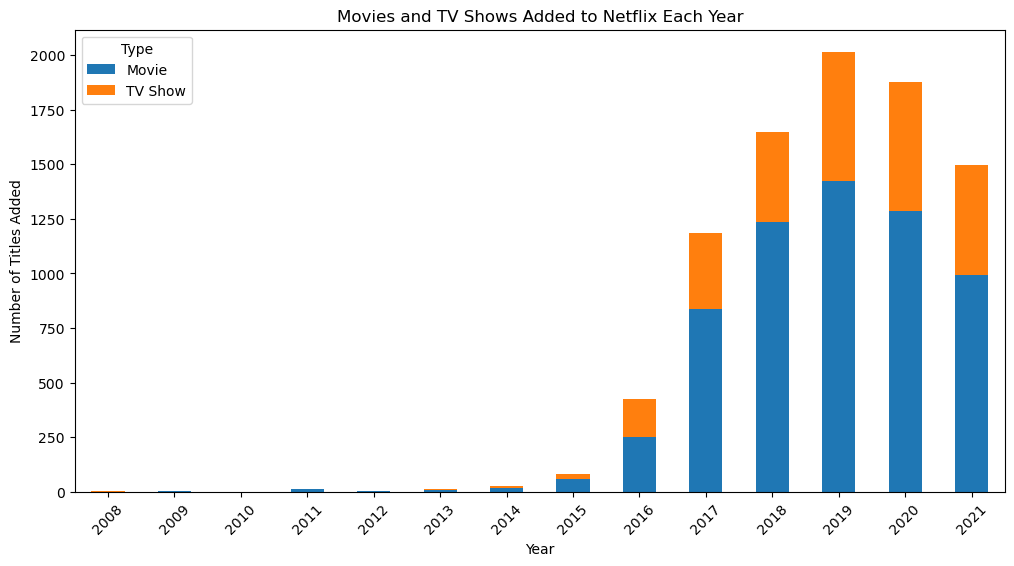

In [191]:
#how many titles are added every year of tv shows and movies

nf['year_added'] = nf['date_added'].dt.year #extracting year from date

yearly_counts = nf.groupby(['year_added', 'type']).size().unstack(fill_value=0) #group by year

print("Movies and TV Shows Added Each Year:")
print(yearly_counts)

#plot bar chart
yearly_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Movies and TV Shows Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

Percentage of Each Genre:
genres
International Movies            14.263502
Dramas                          12.573857
Comedies                         8.676272
International TV Shows           6.991811
Documentaries                    4.503991
Action & Adventure               4.452161
TV Dramas                        3.949414
Independent Movies               3.918317
Children & Family Movies         3.322276
Romantic Movies                  3.192702
Thrillers                        2.990567
TV Comedies                      2.969835
Crime TV Shows                   2.430808
Kids' TV                         2.321965
Docuseries                       2.042086
Music & Musicals                 1.943609
Romantic TV Shows                1.917695
Horror Movies                    1.850316
Stand-Up Comedy                  1.777755
Reality TV                       1.321654
British TV Shows                 1.306106
Sci-Fi & Fantasy                 1.259459
Sports Movies                    1.135068
A

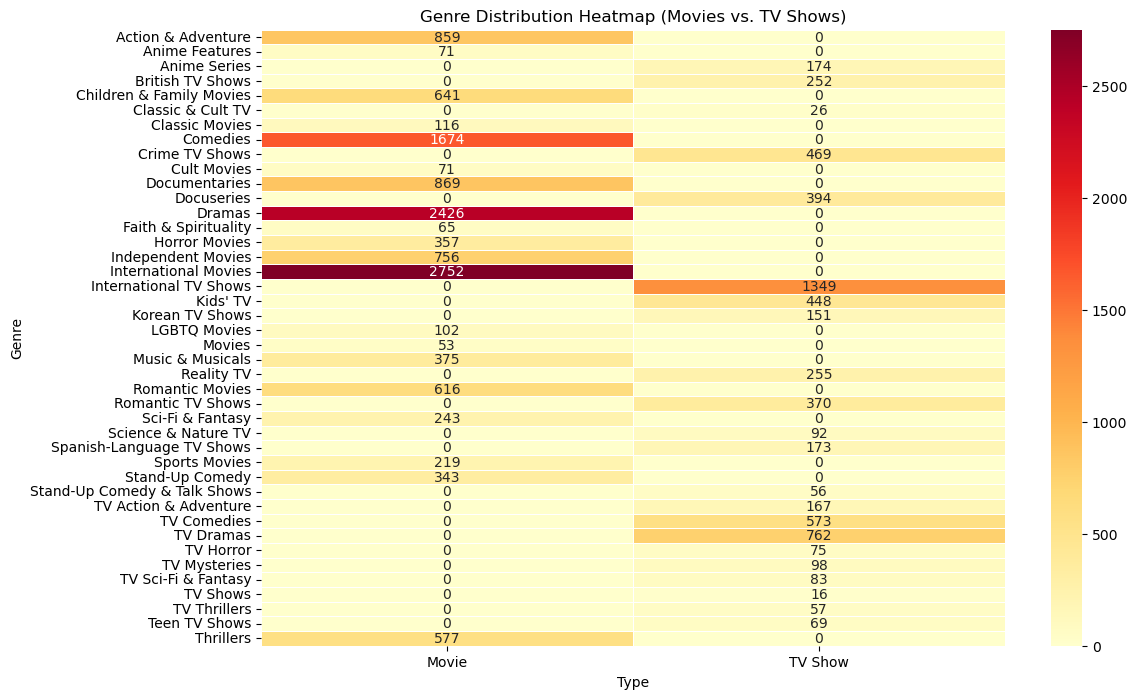

In [193]:
#calculate the percentage of genre of both movies and tv shows on netflix

nf['genres'] = nf['listed_in'].str.split(', ') #splitting in individual genre
exploded_genres = nf.explode('genres') #exploding genre to rows

genre_percentages = exploded_genres['genres'].value_counts(normalize=True) * 100 #calculate percentage

print("Percentage of Each Genre:")
print(genre_percentages)

#heatmap
genre_matrix = pd.crosstab(exploded_genres['genres'], exploded_genres['type'])

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_matrix, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Genre Distribution Heatmap (Movies vs. TV Shows)')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()


Total TV Shows and Movies by Rating:
type      Movie  TV Show
rating                  
G            41        0
NC-17         3        0
NR           75        4
PG          287        0
PG-13       490        0
R           797        2
TV-14      1427      730
TV-G        126       94
TV-MA      2062     1143
TV-PG       540      321
TV-Y        131      175
TV-Y7       139      194
TV-Y7-FV      5        1
UR            3        0


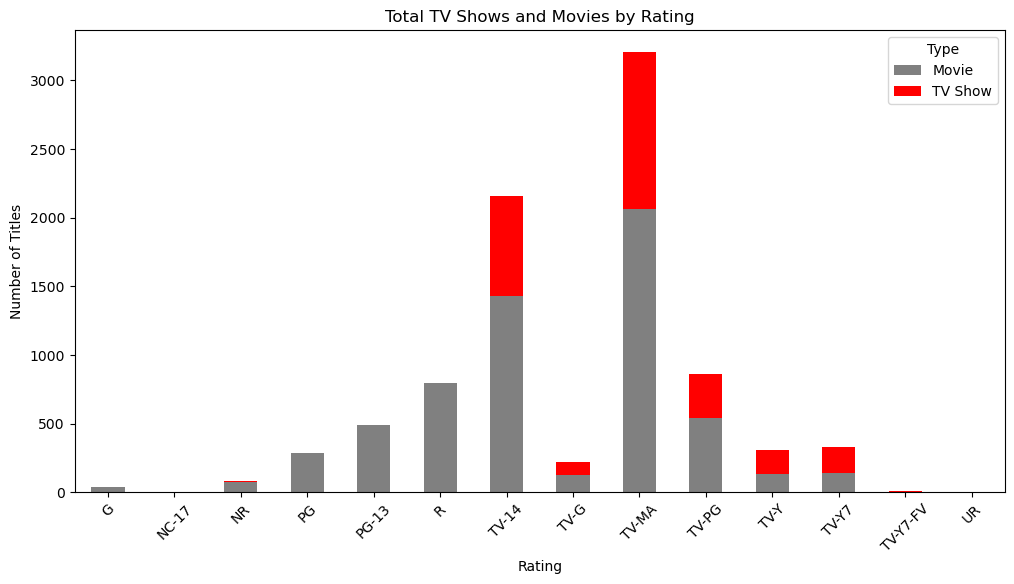

In [648]:
#ratings

rating_counts = nf.groupby(['rating', 'type']).size().unstack(fill_value=0) #group by ratings

print("Total TV Shows and Movies by Rating:")
print(rating_counts)

#Plot bar chart
colors = ['gray', 'red']

rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color = colors)
plt.title('Total TV Shows and Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

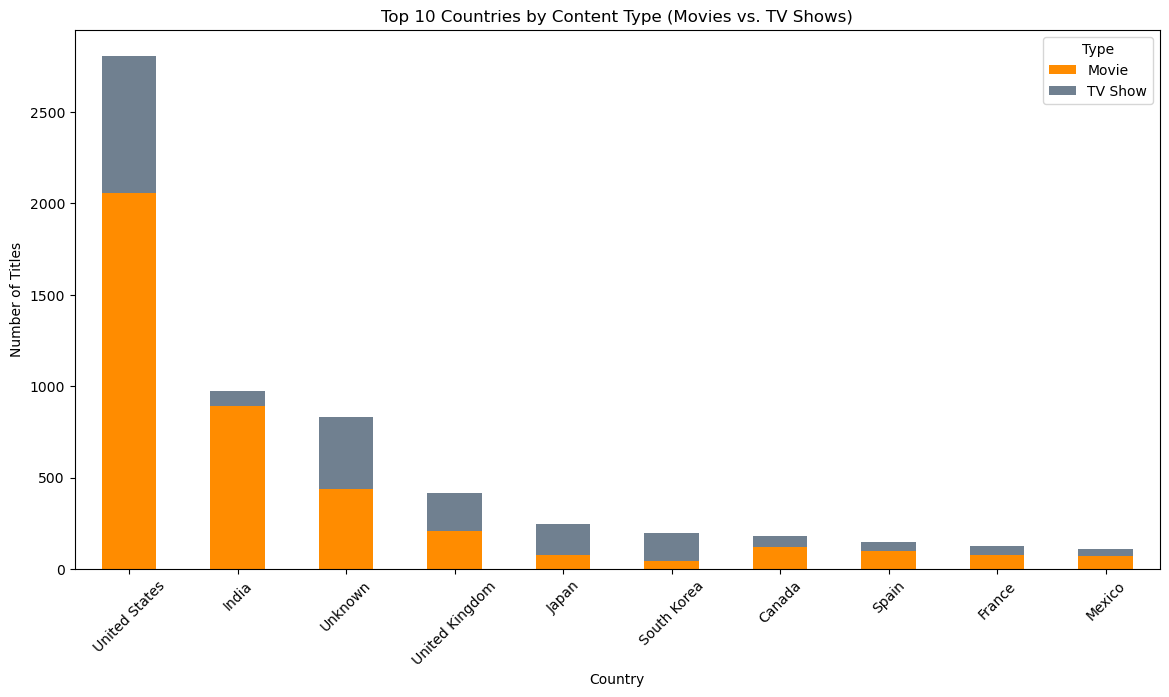

In [652]:
#countries with top movies and tv shows release

country_counts = nf.groupby(['country', 'type']).size().unstack(fill_value=0)

country_counts['Total'] = country_counts['Movie'] + country_counts['TV Show'] #count total titles

top_10_countries = country_counts.sort_values('Total', ascending=False).head(10) #sort by countries

top_10_countries = top_10_countries.drop(columns='Total')

#plot top 10 countries in chart

colors = ['darkorange', 'slategray']
top_10_countries.plot(kind='bar', stacked=True, figsize=(14, 7), color = colors)
plt.title('Top 10 Countries by Content Type (Movies vs. TV Shows)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

In [381]:
world = gpd.read_file("ne_110m_admin_0_countries.shp") # shape file for mapping the countries data

In [393]:
print(top_10_countries.columns) #making sure that the df has coutry column

Index(['Movie', 'TV Show', 'Country'], dtype='object', name='type')


In [385]:
print(world.columns) #exploring the main column where country can be joined

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


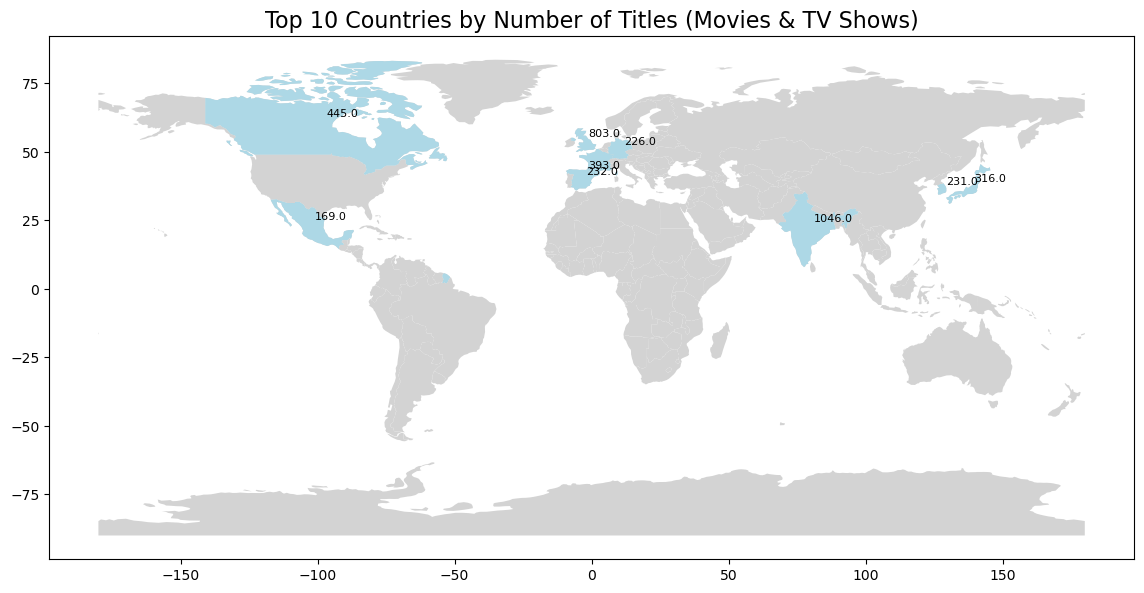

In [395]:

top_10_countries['Country'] = top_10_countries.index #adding country column to the top 10 df

top_10_countries['Country'] = top_10_countries['Country'].str.title()  #capitalize for easeness

world_map = world.set_index('ADMIN').join(top_10_countries.set_index('Country')) #merging world map data with our dataset

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
world.plot(ax=ax, color='lightgrey') #plotting the map and highlight top countries

world_map[world_map['Movie'].notna()].plot(ax=ax, color='lightblue') #highlight top 10 countries with most movies and tv shows

for idx, row in world_map.iterrows():
    if pd.notna(row['Movie']):
        ax.annotate(f"{row['Movie'] + row['TV Show']}", 
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    xytext=(3, 3), textcoords='offset points',
                    fontsize=8, color='black')


plt.title('Top 10 Countries by Number of Titles (Movies & TV Shows)', fontsize=16)
plt.show()


In [547]:
nf1 = nf

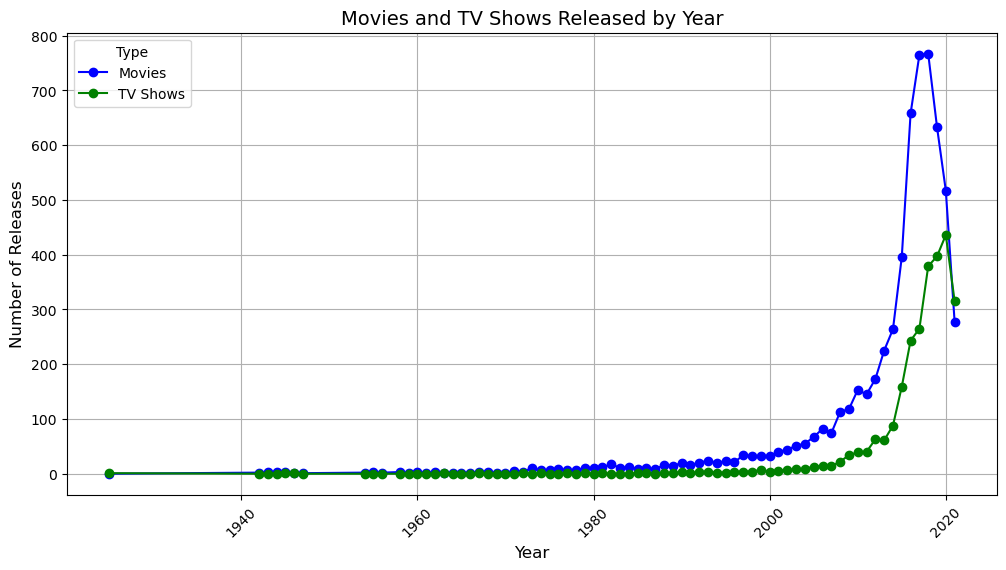

In [539]:

release_counts = nf1.groupby(['release_year', 'type']).size().unstack(fill_value=0) #group titles by release year

#line chart plotting
plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts['Movie'], label='Movies', marker='o', linestyle='-', color='b')
plt.plot(release_counts.index, release_counts['TV Show'], label='TV Shows', marker='o', linestyle='-', color='g')
plt.title('Movies and TV Shows Released by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.legend(title='Type')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [616]:
nf1 = nf
nf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


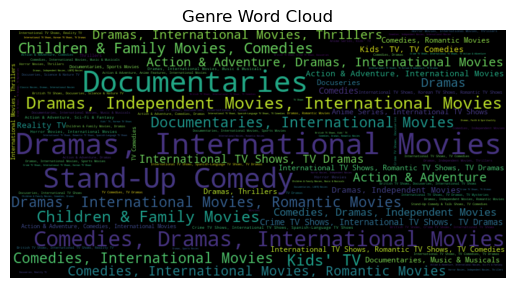

In [618]:
#wordcloud for top 15 popular genre across netflix

exploded_genre = nf1.explode('listed_in')  #exploded genre to rows
genre_counts = exploded_genre['listed_in'].value_counts() #counting all genres 

#wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(genre_counts.to_dict())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Genre Word Cloud')
plt.show()


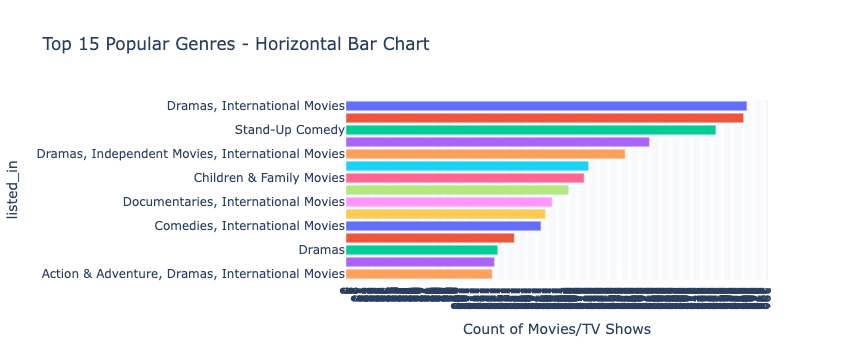

In [634]:
#bar chart for top 15 genre across netflix

genre_counts = exploded_genre['listed_in'].value_counts().reset_index()
genre_counts.columns = ['listed_in', 'Count']

top_15_genre_counts = genre_counts.head(15)

#horizontal bar chart
fig = px.bar(top_15_genre_counts, 
             x='Count', 
             y='listed_in', 
             orientation='h', 
             title='Top 15 Popular Genres - Horizontal Bar Chart', 
             color='listed_in', 
             template='plotly')

fig.update_layout(
    xaxis_title='Count of Movies/TV Shows',
    yaxis_title='listed_in',
    xaxis=dict(tickmode='linear'),
    showlegend=False
)

fig.show()





In [642]:
nf.to_csv('nf-data-clean.csv', index=False)